# Eksamen i Fys1120 H2024


## Magnetisk felt i og rundt en kort solenoide

Vi skal i denne oppgaven studere det magnetiske feltet inne i og rundt en solenoide med strøm $I$ og antall vindinger $M = 5$. Vi studerer først en enkelt sirkulær krets. Deretter setter vi sammen $M$ kretser for å lage en modell for en solenoide.

### Oppgave (a)
En sirkulær krets med radius $a$ ligger i $xy$-planet med sentrum i origo. Det går en strøm $I$ gjennom kretsen i positiv rotasjonsretning. Vis at det magnetiske feltet i origo blir 
$$\vec{B}(0,0,0) = \frac{\mu_0 I}{2a}\hat{z} $$

*(Svar her)*

(*Løsning*)
Vi ser på et bidrag fra et strøm element $I d \vec{l}$ i posisjonen $\vec{r}'$. For dette elementet blir $\vec{R} = \vec{0} - \vec{r}' = - \vec{r}'$. Bidraget til det magnetiske feltet i origo blir da

$$d \vec{B} = \frac{\mu_0}{4 \pi} \frac{I d \vec{l}\times \vec{R}}{R^3}$$

Her ser vi at $d\vec{l}$ og $\vec{R}$ står normalt på hverandre og kryssproduktet vil peke i $z$-retningen. Det gir 

$$d \vec{B} = \frac{\mu_0}{4 \pi} \frac{I d l R}{R^3} \hat{z}$$

Vi ser at $R = a$ ikke endrer seg langs sirkelen. Vi summerer (integrerer) opp alle bidragene fra hele sirkelene som har en lengde $2 \pi a$ og får

$$\vec{B} = \frac{\mu_0}{4 \pi} \frac{I 2 \pi a^2}{a^3} \hat{z} = \frac{\mu_0 I}{2a}\hat{z} $$

## Eksempel
Som hjelp til å løse oppgaven nedenfor kan du ta utgangspunkt i dette eksempelet.

Bidraget til det magnetiske feltet $d\vec{B}$ i punktet $\vec{r}$ fra et strømelement $I\Delta \vec{l}_i$ i punktet $\vec{r}_i$ er gitt av funksjonen ```dBfield(r,ri,Idl)```

In [1]:
import numpy as np
def dBfield(r,ri,Idl):
    mu0 = 1.257e-6
    R = r - ri
    return mu0/(4*np.pi)*np.cross(Idl,R)/np.linalg.norm(R)**3

Det magnetiske feltet fra et strømelement $Idl$ i origo rettet langs $z$-aksen kan visualiseres i $xy$-planet ved

In [2]:
import matplotlib.pyplot as plt
Idl = 1.0*np.array([0,0,1])
ri = np.array([0,0,0])
a = 0.1 # m
Lx, Ly, Nx, Ny = a,a,20,20
x = np.linspace(-Lx,Lx,Nx)
y = np.linspace(-Ly,Ly,Ny)
rx,ry = np.meshgrid(x,y,indexing='ij')
Bx = np.zeros_like(rx)
By = np.zeros_like(ry)
for ix in range(Nx):
    for iy in range(Ny):
        r = np.array([rx[ix,iy],ry[ix,iy],0])
        Bx[ix,iy],By[ix,iy],Bz = dBfield(r,ri,Idl)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.quiver(rx,ry,Bx,By)
plt.xlabel("$x$ (m)"), plt.ylabel("$y$ (m)")
plt.subplot(1,2,2)
plt.streamplot(rx.T,ry.T,Bx.T,By.T)
plt.xlabel("$x$ (m)"), plt.ylabel("$y$ (m)")

(Text(0.5, 0, '$x$ (m)'), Text(0, 0.5, '$y$ (m)'))

## En sirkulær strømkrets
Vi ser først på et system som består av en sirkulær krets med strøm $I$ og radius $a$ som ligger i $xy$-planet med sentrum i origo.

### Oppgave (b)
Skriv en funksjon ```Bcircle(r,r0,a,I,N)``` som finner det magnetiske feltet $\vec{B}(\vec{r})$ i punktet $\vec{r}$ fra en sirkelformet krets med en strøm $I$ som har en radius $a$ og ligger i et plan parallellt med $xy$-planet med sentrum i punktet $\vec{r}_0$. Her er $N$ antall diskrete elementer som brukes til å beskrive sirkelen. Det er tilstrekkelig å bruke f.eks. $N=100$.

In [3]:
# Svar

In [4]:
# Løsning
import numpy as np
def Bcircle(r,r0,a,I,N):
    mu0 = 1.257e-6
    K = mu0/(4*np.pi)
    B = np.array([0,0,0])
    Idl = I*a*2*np.pi/N
    for j in range(N):
        theta = (j/N)*2*np.pi
        rj = r0 + np.array([a*np.cos(theta),a*np.sin(theta),0])
        dlvec = np.array([-np.sin(theta),np.cos(theta),0])
        R = r-rj
        dB = K*Idl*np.cross(dlvec,R)/np.linalg.norm(R)**3
        B = B + dB
    return B

### Oppgave (c)
Sjekk funksjonen din ved å sammenlikne resultatet fra funksjonen med det eksakte resultatet fra oppgave (a) ved å bruke $a=0.1$m, $I = 1$A.

In [5]:
# Svar

In [6]:
# Løsning
# Vi tester ved å sette r0 = (0,0,0)
r0 = np.array([0,0,0])
I = 1.0
a = 0.1
N = 10 # Det betyr ikke noe hva N er for denne spesielle utregningen
r = np.array([0,0,0])
Bnum = Bcircle(r,r0,a,I,N)
print("Numerisk = ",Bnum)
mu0 = 1.257e-6
Bexact = mu0*I/(2.0*a)*np.array([0,0,1])
print("Eksakt = ",Bexact)

Numerisk =  [0.000e+00 0.000e+00 6.285e-06]
Eksakt =  [0.000e+00 0.000e+00 6.285e-06]


### Oppgave (d)
Visualiser det magnetiske feltet i $xz$-planet. Velg et utsnitt som du anser som passende.

In [7]:
# Svar

In [8]:
# Løsning (1 av 2)
a = 0.1
I = 1.0
Lx, Lz, Nx, Nz = 2*a,2*a,20,20
x = np.linspace(-Lx,Lx,Nx)
z = np.linspace(-Lz,Lz,Nz)
rx,rz = np.meshgrid(x,z,indexing='ij')
Bx = np.zeros_like(rx)
Bz = np.zeros_like(rz)
r0 = np.array([0,0,0])
N = 100
for ix in range(Nx):
    for iz in range(Nz):
        r = np.array([rx[ix,iz],0,rz[ix,iz]])
        Bx[ix,iz],By,Bz[ix,iz] = Bcircle(r,r0,a,I,N)

Text(0.5, 0, '$x$ (m)')

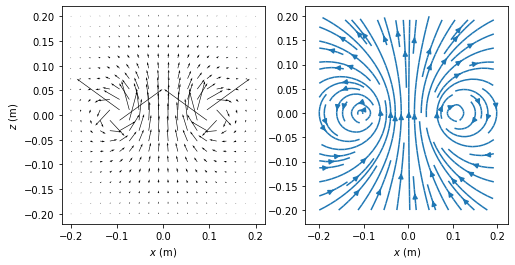

In [9]:
# Løsning (2 av 2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Bx,Bz)
plt.xlabel("$x$ (m)"), plt.ylabel("$z$ (m)")
plt.subplot(1,2,2)
plt.streamplot(rx.T,rz.T,Bx.T,Bz.T)
plt.xlabel("$x$ (m)")

## En kort solenoide
Vi skal nå se på en kort solenoide som består av $M$ sirkulære kretser som ligger i plan parallelle med $xy$-planet. De har radius $a$ og sentrum på $z$-aksen. Kretsene er plassert ut slik at de er jevnt fordelt fra $z = a$ til $z=-a$. Den samme strømmen $I$ går i positiv retning i alle de $M$ kretsene.

### Oppgave (e)
Skriv en funksjon ```Bsolenoide(r,a,I,N,M)``` som finner det magnetiske feltet $\vec{B}(\vec{r})$ fra en solenoide som beskrevet ovenfor og som består av $M$ sirkulære kretser.  Tallet $N$ angir antall elementer som brukes til å beskrive hver enkelt sirkulære krets.

In [10]:
# Svar

In [11]:
# Løsning
import numpy as np
def Bsolenoide(r,a,I,N,M):
    B = np.array([0,0,0])
    # Lag M sirkulære strømmer og summer bidragene
    for i in range(M):
        zi = -a + (2*a)/(M-1)*i
        r0 = np.array([0,0,zi])
        B = B + Bcircle(r,r0,a,I,N)
    return B

### Oppgave (f)
Bruk funksjonen ```Bsolenoide``` til å visualisere det magnetiske feltet i $xz$-planet for $M = 5$. Velg et utsnitt som du mener er passende.

In [12]:
# Svar

In [13]:
# Løsning (1 av 2)
a = 0.1
I = 1.0
Lx, Lz, Nx, Nz = 2*a,2*a,20,20
x = np.linspace(-Lx,Lx,Nx)
z = np.linspace(-Lz,Lz,Nz)
rx,rz = np.meshgrid(x,z,indexing='ij')
Bx = np.zeros_like(rx)
Bz = np.zeros_like(rz)
r0 = np.array([0,0,0])
N = 100 # Antall elementer i hver krets
M = 5 # Antall sirkulære kretser
for ix in range(Nx):
    for iz in range(Nz):
        r = np.array([rx[ix,iz],0,rz[ix,iz]])
        Bx[ix,iz],By,Bz[ix,iz] = Bsolenoide(r,a,I,N,M)

In [14]:
# Løsning (2 av 2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Bx,Bz)
plt.xlabel("$x$ (m)"), plt.ylabel("$z$ (m)")
plt.subplot(1,2,2)
plt.streamplot(rx.T,rz.T,Bx.T,Bz.T)
plt.xlabel("$x$ (m)")

Text(0.5, 0, '$x$ (m)')

### Oppgave (g)
Plot det magnetiske feltet i $z$-retningen langs tre linjer som er parallelle med $z$-aksen, dvs. $B_z(0,0,z)$, $B_z(a/3,0,z)$ og $B_z(2a/3,0,z)$, i området fra $z=-a$ til $z=a$. Kommenter resultatet. Stemmer dette med hva du forventer for en solenoide?

In [15]:
# Svar

In [20]:
# Løsning - kode
N = 100
a = 0.1
M = 5
Ni = 100
zp = np.linspace(-a,a,Ni)
Bz1 = np.zeros_like(zp)
Bz2 = np.zeros_like(zp)
Bz3 = np.zeros_like(zp)
for i in range(Ni):
    zi = zp[i]
    r1 = np.array([0,0,zi])
    Bxi,Byz,Bzi = Bsolenoide(r1,a,I,N,M)
    Bz1[i] = Bzi
    r2 = np.array([a/3,0,zi])
    Bxi,Byz,Bzi = Bsolenoide(r2,a,I,N,M)
    Bz2[i] = Bzi
    r3 = np.array([2*a/3,0,zi])
    Bxi,Byz,Bzi = Bsolenoide(r3,a,I,N,M)
    Bz3[i] = Bzi

(Text(0.5, 0, '$z$ (m)'), Text(0, 0.5, '$B_z$'))

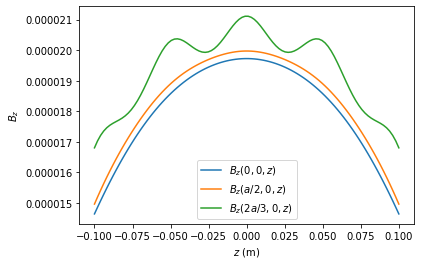

In [21]:
# Løsning - plot
plt.plot(zp,Bz1,label="$B_z(0,0,z)$")
plt.plot(zp,Bz2,label="$B_z(a/2,0,z)$")
plt.plot(zp,Bz3,label="$B_z(2a/3,0,z)$")
plt.legend()
plt.xlabel("$z$ (m)"), plt.ylabel("$B_z$")

*(Løsning - tekst)*:
Vi forventer at det magnetiske feltet skal være uniformt inne i solenoiden og null på utsiden av solenoiden. Vi ser at det er liten forskjell mellom feltet i midten, dvs. $x=0$, og langs linjen $x=a/3$. Det er som forventet. For $x=2a/3$ ser vi at det er en viss varisjon langsmed solenoiden. Det skyldes endeeffekter. Vi forventer at begge disse variasjonene vil bli mindre hvis f.eks. solenoiden gjøres lang i forhold til radius.

Hvis vi plo
Vi ser at feltet på utsiden av solenoiden er mye mindre enn inne i solenoiden. Det går ikke helt til null, slik vi forventer for en uendelig lang solenoide. Det er ikke uventet siden solenoiden har en endelig lengde. Feltet utenfor peker i negativ $z$-retning som forventet.


In [22]:
# Sammenlikning innenfor og utenfor
N = 100
a = 0.1
M = 5
Ni = 100
zp = np.linspace(-a,a,Ni)
Bz1 = np.zeros_like(zp)
Bz2 = np.zeros_like(zp)
Bz3 = np.zeros_like(zp)
for i in range(Ni):
    zi = zp[i]
    r1 = np.array([0,0,zi])
    Bxi,Byz,Bzi = Bsolenoide(r1,a,I,N,M)
    Bz1[i] = Bzi
    r2 = np.array([a/2,0,zi])
    Bxi,Byz,Bzi = Bsolenoide(r2,a,I,N,M)
    Bz2[i] = Bzi
    r3 = np.array([2*a,0,zi])
    Bxi,Byz,Bzi = Bsolenoide(r3,a,I,N,M)
    Bz3[i] = Bzi


(Text(0.5, 0, '$z$ (m)'), Text(0, 0.5, '$B_z$'))

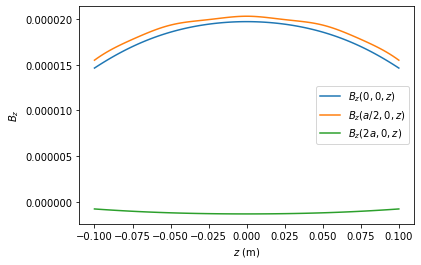

In [23]:
plt.plot(zp,Bz1,label="$B_z(0,0,z)$")
plt.plot(zp,Bz2,label="$B_z(a/2,0,z)$")
plt.plot(zp,Bz3,label="$B_z(2a,0,z)$")
plt.legend()
plt.xlabel("$z$ (m)"), plt.ylabel("$B_z$")